In [ ]:
#!pip install pandas matplotlib seaborn numpy

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
plt.rcParams['figure.dpi'] = 150


In [ ]:
df_mix = pd.read_csv('task_B_results.csv', parse_dates=['month'])
df_mix['total_revenue'] = df_mix['revenue_new'] + df_mix['revenue_returning']
print("Task B Data Shape:", df_mix.shape)
df_mix.head()


Task B Data Shape: (48, 8)


,month,active_customers,new_customers,returning_customers,revenue_new,revenue_returning,pct_revenue_from_returning,total_revenue
0,2019-01-01,2,2,0,95.429999,0.0,0.000000,95.429999
1,2019-02-01,6,5,1,516.889998,18.0,0.033652,534.889998
2,2019-03-01,15,15,0,1202.979996,0.0,0.000000,1202.979996
3,2019-04-01,18,18,0,1535.130003,0.0,0.000000,1535.130003
4,2019-05-01,13,13,0,1284.810013,0.0,0.000000,1284.810013


In [ ]:
df_churn = pd.read_csv('task_C_results.csv', parse_dates=['month'])
df_churn = df_churn.merge(df_mix[['month', 'total_revenue']], on='month', how='left')
df_churn = df_churn.rename(columns={'total_revenue': 'revenue'})
print("Task C Data Shape:", df_churn.shape)
df_churn.head()


Task C Data Shape: (48, 5)


,month,active_customers,churned_customers_90d,churn_rate_90d,revenue
0,2019-01-01,2,1,0.500000,95.429999
1,2019-02-01,6,6,1.000000,534.889998
2,2019-03-01,15,15,1.000000,1202.979996
3,2019-04-01,18,17,0.944444,1535.130003
4,2019-05-01,13,12,0.923077,1284.810013


In [ ]:
df_prepost = pd.read_csv('task_D_results.csv')
print("Task D Data Shape:", df_prepost.shape)
df_prepost


Task D Data Shape: (4, 5)


,period,high_value_flag,orders,revenue,aov
0,Post,False,554,28387.800053,51.241516
1,Post,True,152,28535.520043,187.733684
2,Pre,False,517,26279.210029,50.830193
3,Pre,True,127,23193.670013,182.627323


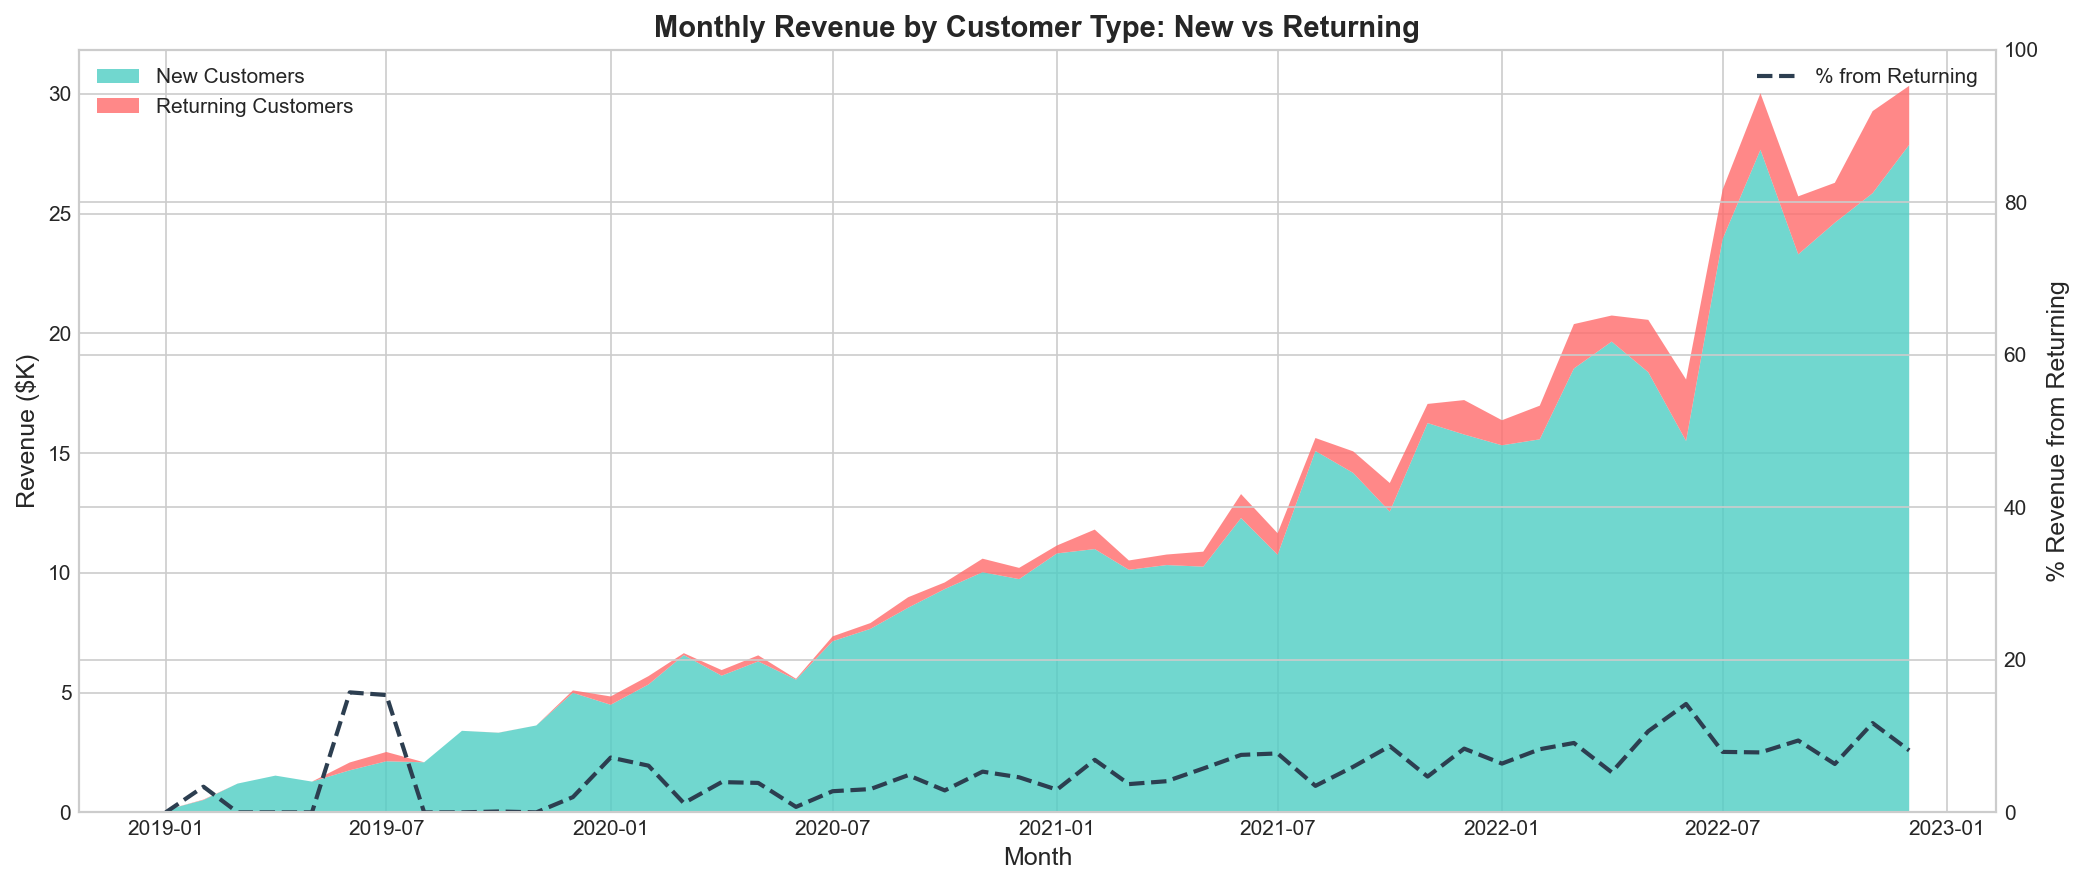

In [ ]:
fig, ax1 = plt.subplots(figsize=(14, 6))
ax1.stackplot(
    df_mix['month'],
    df_mix['revenue_new'] / 1000,
    df_mix['revenue_returning'] / 1000,
    labels=['New Customers', 'Returning Customers'],
    colors=['#4ECDC4', '#FF6B6B'],
    alpha=0.8
)
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Revenue ($K)', fontsize=12)
ax1.set_title('Monthly Revenue by Customer Type: New vs Returning', fontsize=14, fontweight='bold')
ax1.legend(loc='upper left')
ax2 = ax1.twinx()
ax2.plot(
    df_mix['month'],
    df_mix['pct_revenue_from_returning'] * 100,
    color='#2C3E50',
    linewidth=2,
    linestyle='--',
    label='% from Returning'
)
ax2.set_ylabel('% Revenue from Returning', fontsize=12)
ax2.set_ylim(0, 100)
ax2.legend(loc='upper right')
plt.tight_layout()
plt.savefig('visual_1_new_vs_returning.png', dpi=150, bbox_inches='tight')
plt.show()

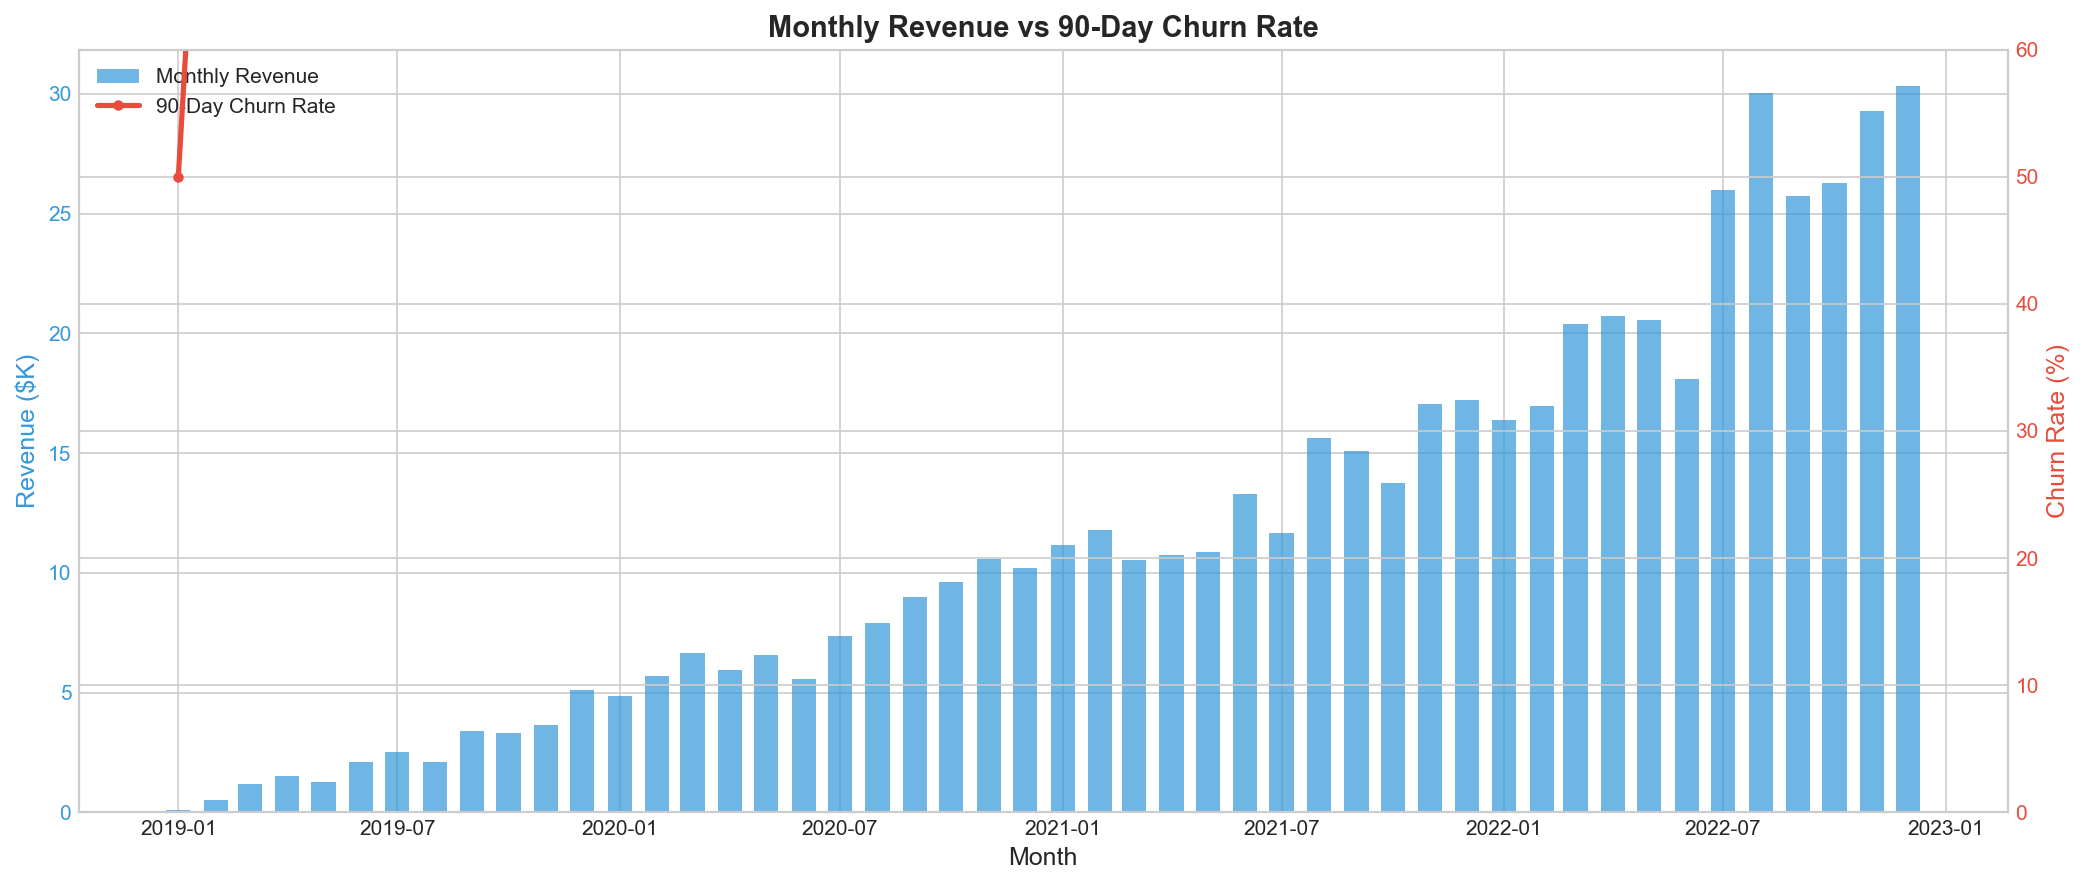

In [ ]:
fig, ax1 = plt.subplots(figsize=(14, 6))
color_revenue = '#3498DB'
ax1.bar(
    df_churn['month'],
    df_churn['revenue'] / 1000,
    width=20,
    alpha=0.7,
    color=color_revenue,
    label='Monthly Revenue'
)
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Revenue ($K)', fontsize=12, color=color_revenue)
ax1.tick_params(axis='y', labelcolor=color_revenue)
ax2 = ax1.twinx()
color_churn = '#E74C3C'
ax2.plot(
    df_churn['month'],
    df_churn['churn_rate_90d'] * 100,
    color=color_churn,
    linewidth=2.5,
    marker='o',
    markersize=4,
    label='90-Day Churn Rate'
)
ax2.set_ylabel('Churn Rate (%)', fontsize=12, color=color_churn)
ax2.tick_params(axis='y', labelcolor=color_churn)
ax2.set_ylim(0, 60)
plt.title('Monthly Revenue vs 90-Day Churn Rate', fontsize=14, fontweight='bold')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
plt.tight_layout()
plt.savefig('visual_2_churn_vs_revenue.png', dpi=150, bbox_inches='tight')
plt.show()


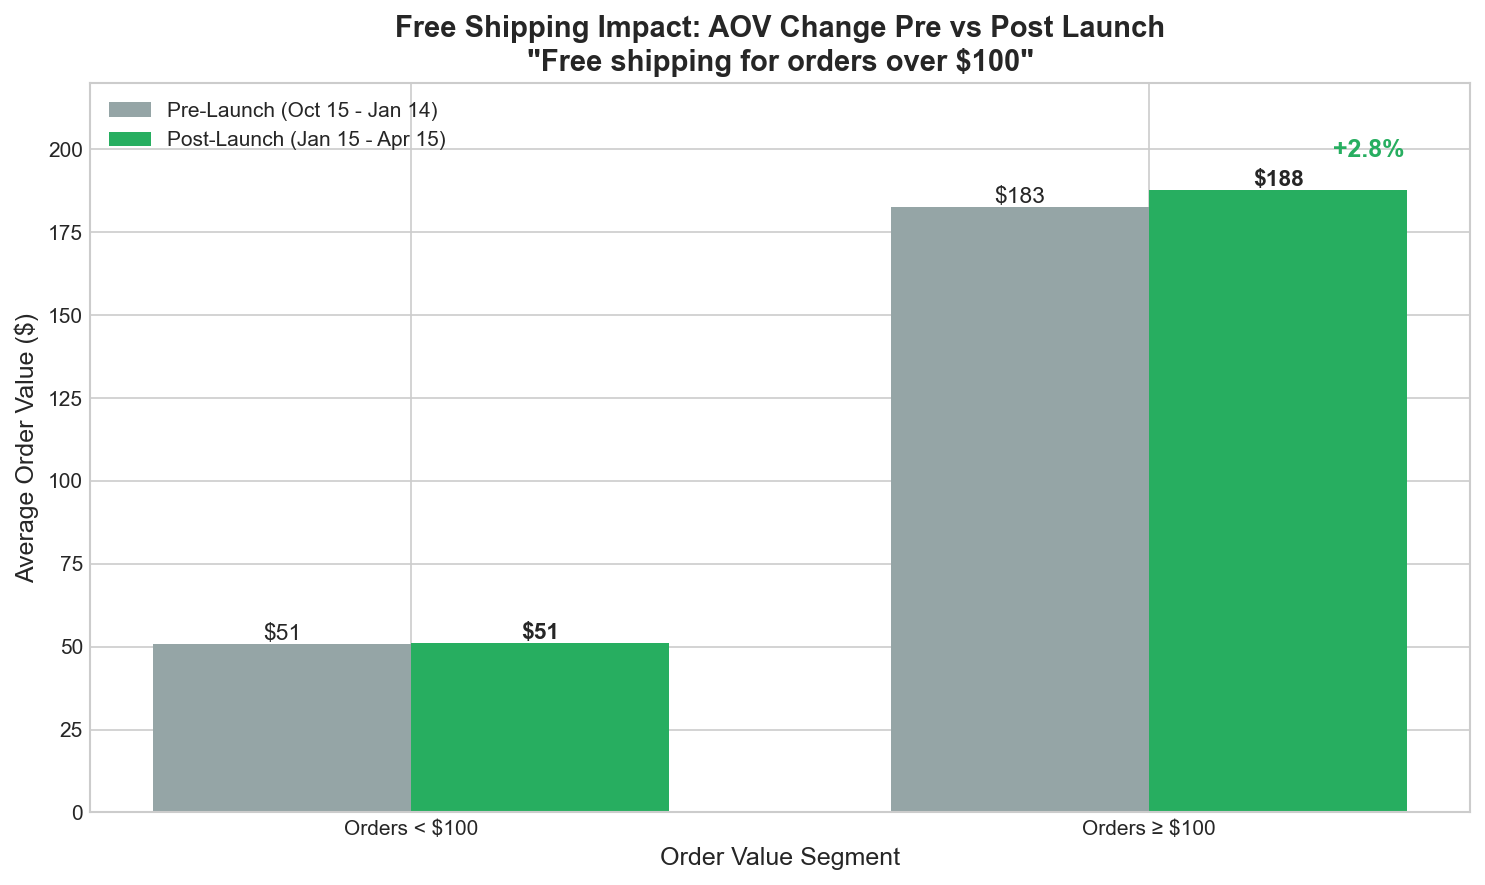

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
prepost_pivot = df_prepost.pivot(index='high_value_flag', columns='period', values='aov')
prepost_pivot = prepost_pivot[['Pre', 'Post']]
prepost_pivot.index = ['Orders < $100', 'Orders ≥ $100']
x = np.arange(len(prepost_pivot.index))
width = 0.35
bars1 = ax.bar(x - width/2, prepost_pivot['Pre'], width, label='Pre-Launch (Oct 15 - Jan 14)', color='#95A5A6')
bars2 = ax.bar(x + width/2, prepost_pivot['Post'], width, label='Post-Launch (Jan 15 - Apr 15)', color='#27AE60')
ax.set_xlabel('Order Value Segment', fontsize=12)
ax.set_ylabel('Average Order Value ($)', fontsize=12)
ax.set_title('Free Shipping Impact: AOV Change Pre vs Post Launch\n"Free shipping for orders over $100"', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(prepost_pivot.index)
ax.legend(loc='upper left')
ax.set_ylim(0, 220)
for bar in bars1:
    ax.annotate(f'${bar.get_height():.0f}',
                 xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='bottom', fontsize=11)
for bar in bars2:
    ax.annotate(f'${bar.get_height():.0f}',
                 xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                 ha='center', va='bottom', fontsize=11, fontweight='bold')
pre_high = prepost_pivot.loc['Orders ≥ $100', 'Pre']
post_high = prepost_pivot.loc['Orders ≥ $100', 'Post']
pct_change = ((post_high / pre_high) - 1) * 100
ax.annotate(f'+{pct_change:.1f}%', xy=(1.25, post_high + 10), fontsize=12, fontweight='bold', color='#27AE60')
plt.tight_layout()
plt.savefig('visual_3_free_shipping_impact.png', dpi=150, bbox_inches='tight')
plt.show()
